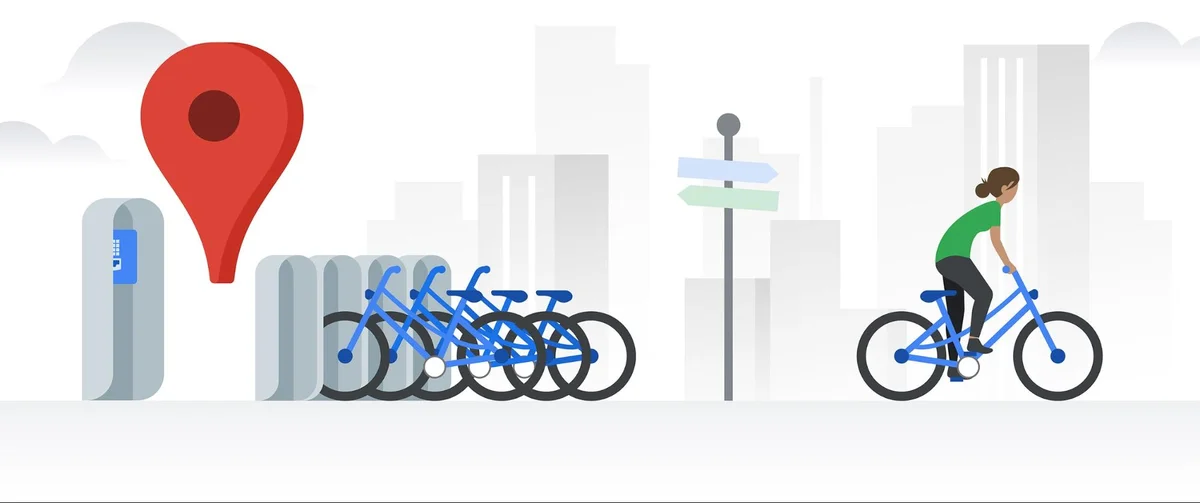

# **Bike Sharing**

**CONTENTS**  
1. **Business Problem Understanding**

    * Background Context

    * Problem Statement

    * Objective

    * Analytic Approach

2. **Data Understanding**

3. **Data Preprocessing**

4. **Modelling**

5. **Conclusion and Recommendation**
---



## **Business Problem Understanding**

<!-- 

**Bike sharing** is booming as this two-wheeled technology transforms how people get from A to B in cities around the planet. With an estimated 1,600 bikeshare systems and more than 18 million shared bikes in urban centers worldwide, bikesharing has gone mainstream. And for good reason--it’s a convenient, affordable, fun and hassle-free way to get around.

**Bike sharing** systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position.

Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues. -->

#### **Background Context**

With rapid urban growth, the need for efficient, environmentally friendly, and affordable transportation alternatives is increasing. In this context, bike rental systems, also known as bike sharing, have become a popular solution in many cities worldwide.

**Importance of Bike Sharing**
<br>
* **Urban Mobility** : Bike sharing provides easy and flexible transportation access for city residents, tourists, and workers.<br>
* **Health and Environment** : Using bicycles as a means of transportation reduces air pollution and carbon emissions, and promotes an active and healthy lifestyle.<br>
* **Traffic Congestion** : Bike sharing can help alleviate traffic congestion by providing a faster and more efficient transportation alternative, especially for short trips within the city.

#### **Problem Statement**

Bike sharing systems have emerged as a popular solution for urban transportation needs, offering a convenient, environmentally friendly, and cost-effective mode of travel. However, managing bike sharing operations efficiently requires a deep understanding of usage patterns, factors influencing demand, and operational challenges.

The aim of this project is to perform predictive analysis on bike sharing data to optimize the operation of the bike sharing system. By leveraging machine learning techniques, we seek to predict the demand for bicycles based on various factors such as weather conditions, time of day, day of the week, and special events.

The goal is accurate predictive models that can forecast bike demand with high precision, insights into key factors influencing bike usage patterns, facilitating informed decision-making in system optimization and infrastructure planning. 

#### **Analytical Approach**

* First, we will begin by conducting exploratory data analysis (EDA) to gain a deeper understanding of the dataset. 
* Then, we do data preprocessing on the dataset so it become suitable and can be processed by the model.
* Next, we do Feature Engineering on the feature if needed.
* After that, we do model benchmarking from some of existed powerful regression model and choose the best fit model for our dataset.
* Last, we do hyperparameter tuning on the choosed model to maximize model performance.


## **Data Understanding**

| Feature    | Description                                                                                                                            |
|------------|----------------------------------------------------------------------------------------------------------------------------------------|
| dtoday     | date                                                                                                                                   |
| season     | season (1: winter, 2: spring, 3: summer, 4: fall)                                                                                      |
| hr         | hour (0 to 23)                                                                                                                         |
| holiday    | holiday or not                                                                                                                         |
| temp       | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)          |
| atemp      | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| hum        | normalized humidity. The values are divided into 100 (max)                                                                             |
| casual     | count of casual users                                                                                                                  |
| registered | count of registered users                                                                                                              |
| cnt        | count of total rental bikes including both casual and registered                                                                       |
| weathersit | 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                                                     |
|            | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                                                        |
|            | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds                                             |
|            | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                                                          |

In [29]:
import warnings
warnings.filterwarnings('ignore')

#Data Processing Libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport


#Data Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp

#Data Preprocessing Libraries
from sklearn.impute import SimpleImputer, KNNImputer  
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Data Modeling Libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import TransformedTargetRegressor
import time

In [30]:
df = pd.read_csv('Data Bike Sharing.csv')
df

dteday   hum  weathersit  holiday  season   atemp  temp  hr  \
0      2011-12-09  0.62           1        0       4  0.3485  0.36  16   
1      2012-06-17  0.64           1        0       2  0.5152  0.54   4   
2      2011-06-15  0.53           1        0       2  0.6212  0.62  23   
3      2012-03-31  0.87           2        0       2  0.3485  0.36   8   
4      2012-07-31  0.55           1        0       3  0.6970  0.76  18   
...           ...   ...         ...      ...     ...     ...   ...  ..   
12160  2012-01-25  0.75           1        0       1  0.2273  0.24   7   
12161  2012-07-06  0.62           1        0       3  0.7424  0.78   0   
12162  2012-02-20  0.60           2        1       1  0.2121  0.24   5   
12163  2012-03-31  0.77           2        0       2  0.4242  0.42   2   
12164  2011-04-28  0.47           1        0       2  0.6212  0.64  18   

       casual  registered  cnt  
0          24         226  250  
1           2          16   18  
2          17          90  107  
3          19         126  145  
4          99         758  857  
...       ...         ...  ...  
12160      14         243  257  
12161      39          63  102  
12162       0           6    6  
12163      14          55   69  
12164      44         486  530  

[12165 rows x 11 columns]

The dataset contains historical data on bike sharing from 2011 to 2012, recording various attributes such as the date and time of bike rentals, weather conditions, and other relevant factors.

Upon inspection of the dataset, we observe several key features:

* dteday: Records the date and time of bike rentals.
* season: Indicates the season of the year (spring, summer, fall, winter).
* holiday: Specifies whether it is a holiday or not (1 for holiday, 0 otherwise).
* weather: Describes the weather conditions at the time of rental (clear, mist, light rain, heavy rain).
* temp: Represents the temperature in Celsius.
* atemp: Reflects the "feels like" temperature in Celsius.
* humidity: Indicates the relative humidity.
* casual: number of non-registered user rentals initiated. 
* registered: number of registered user rentals initiated.
* count: Represents the total number of rental bikes.

In [31]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Explorative Data Analysis (EDA)

#### Categorical Features

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


The data consists of 12,165 entries and 11 columns. Each column has a different data type, such as integer, float, and object (string).

In [33]:
df.duplicated().sum()

0

The data indicates that there are no duplicate rows in the dataset, there are no identical entries that need to be addressed during data cleaning or preprocessing.

In [34]:
df.isnull().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

The fata indicates that there are no missing values present in any of the columns of the dataset. This is crucial as it suggests that the dataset is complete, with all required information available for analysis.

## **Preprocessing**

In [35]:
# Changing dtype of dteday from object to datetime64
df['dteday'] = df['dteday'].astype('datetime64')

# Sorting the data by time
df = df.sort_values(['dteday', 'hr']).reset_index()
df.drop(columns='index', inplace=True)

# Renaming some columns
df.rename({'dteday':'date', 'hum':'humidity', 'hr':'hour', 'weathersit':'weather', 'cnt':'count'}, axis=1, inplace=True)

In [36]:
#replace value weathersit column
df['weather'] = df['weather'].replace({1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'})

#replace value season column
df['season'] = df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Splitting year, month, and day into separate columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.strftime('%A')
df

date  humidity weather  holiday  season   atemp  temp  hour  \
0     2011-01-01      0.81   Clear        0  Spring  0.2879  0.24     0   
1     2011-01-01      0.80   Clear        0  Spring  0.2727  0.22     1   
2     2011-01-01      0.80   Clear        0  Spring  0.2727  0.22     2   
3     2011-01-01      0.75   Clear        0  Spring  0.2879  0.24     3   
4     2011-01-01      0.75   Clear        0  Spring  0.2879  0.24     4   
...          ...       ...     ...      ...     ...     ...   ...   ...   
12160 2012-12-31      0.45    Mist        0  Spring  0.2727  0.28    14   
12161 2012-12-31      0.48    Mist        0  Spring  0.2576  0.26    16   
12162 2012-12-31      0.48    Mist        0  Spring  0.2879  0.26    17   
12163 2012-12-31      0.60    Mist        0  Spring  0.2576  0.26    19   
12164 2012-12-31      0.60   Clear        0  Spring  0.2576  0.26    21   

       casual  registered  count  year     month  day  day_name  
0           3          13     16  2011   January    1  Saturday  
1           8          32     40  2011   January    1  Saturday  
2           5          27     32  2011   January    1  Saturday  
3           3          10     13  2011   January    1  Saturday  
4           0           1      1  2011   January    1  Saturday  
...       ...         ...    ...   ...       ...  ...       ...  
12160      62         185    247  2012  December   31    Monday  
12161      30         184    214  2012  December   31    Monday  
12162      14         150    164  2012  December   31    Monday  
12163      11         108    119  2012  December   31    Monday  
12164       7          83     90  2012  December   31    Monday  

[12165 rows x 15 columns]

**Datetime Conversion**: The `dteday` column, representing the date, has been converted from the *object* data type to *datetime64*. This conversion enables easier manipulation

**Data Sorting**: The dataset has been sorted by date `dteday` and hour `hr`

**Column Renaming**: Some column names have been modified for clarity and consistency. For instance, `dteday` has been renamed to `date`, `hum` to `humidity`, `hr` to `hour`, `weathersit` to `weather`, and `cnt` to `count`. These changes improve the interpretability of the dataset.

**Categorical Value Replacement**: The values in the `weather` column have been replaced with descriptive categories *('Clear', 'Mist', 'Light Rain', 'Heavy Rain')*. This transformation makes the weather conditions easier to interpret and analyze. Similarly, the values in the `season` column have been replaced with descriptive categories *('Spring', 'Summer', 'Fall', 'Winter')*. This change enhances the understanding of seasonal patterns in bike sharing activity.

**Feature Engineering**: Additional features have been extracted from the `date` column, including `year`, `month`, `day`, and `day_name`. These new features provide more granular insights into temporal patterns and facilitate analysis at different time scales.


In [37]:
# Features vs Count
style.use('default')
fig, axes = plt.subplots(2,2, figsize=(21, 10))
sns.barplot(data=df, x='weather', y='count', ax=axes[0,0])
sns.barplot(data=df, x='holiday', y='count', ax=axes[0,1])
sns.barplot(data=df, x='season', y='count', ax=axes[1,0])
sns.lineplot(data=df, x='hour', y='count', ax=axes[1,1]);
plt.show()

* Weather affects number of bike rented negatively, number of bike rented is the highest when its weather 1 (sunny), and the lowest when its weather 4 (storm).

* People tend to rent bike on non-holiday.

* Based on season, number of bike rented is at its highest when its summer, and lowest when its winter.

* People tend to rent bike on a certain hour, 8 AM and 5 PM to be specific. More of that on graph below.

In [38]:
plt.figure(figsize=(9,5))
sns.pointplot(data=df, x='hour', y='count', hue='season');
plt.show()

Despite of the season, the trend stays the same, bike rent is at its peak at 8 AM and 5 PM.

In [39]:
plt.figure(figsize=(9,5))
sns.pointplot(data=df, x='hour', y='count', hue='holiday');
plt.show()

From graph above, we could infer that less people rent bike on a holiday. And most people rent bike at around 1 PM or 3 PM.

In [40]:
plt.figure(figsize=(9,5))
sns.pointplot(data=df, x='hour', y='count', hue='weather');
plt.show()

Out of 12.165 data, only 3 of those have weather value = 4, this might be considered noise, but if we drop weather = 4, it'll affect model's performance negatively (discovered after comparing model's performance when it's dropped vs when it's not). Therefore, we won't drop these 3 rows.

In [41]:
plt.figure(figsize=(9,5))
sns.pointplot(data=df, x='hour', y='count', hue='day_name');
plt.show()

Peak Hours: On weekdays (Monday to Friday), there are two prominent peaks in bike rental counts. The first peak occurs during the morning rush hours, typically between 7 AM and 9 AM, indicating commuters using bikes to travel to work or school. The second peak is observed during the evening rush hours, typically between 4 PM and 7 PM, as individuals return home.

Weekend Patterns: On weekends (Saturday and Sunday), the pattern differs significantly. There is a more gradual increase in rental counts during the morning hours, with a peak around midday. This pattern suggests that people may be using bikes for leisure activities or errands during the weekend mornings and afternoons.

Consistent Demand: Across all days of the week, there is a consistent demand for bike rentals during the late morning to early afternoon hours, indicating potential usage for various activities such as lunch breaks, short trips, or recreational rides.

In [42]:
#Slicing Numerical Data
numerical = ['humidity', 'atemp', 'temp', 'hour', 'casual', 'registered', 'count']

#Create boxplot to see Global Outliers
fig = make_subplots(rows=2, cols=4, vertical_spacing=0.05)

for i, col in enumerate(numerical, start=1):
    fig.add_trace(
        go.Box(y=df[col], name=col),
        row=(i-1)%2 + 1,
        col=(i-1)//2 + 1
    )
fig.update_layout(height=1000, width=1000)
fig.show()
print('Total data before drop outliers:', df.shape[0])

Total data before drop outliers: 12165


The boxplot analysis reveals outliers in the humidity feature, notably with values of 0. Such instances are likely anomalies as 0 humidity is uncommon and suggests either highly controlled environments or potential data recording errors. Total data before drop outliers is 12.165.

In [43]:
#count humidity = 0 percentage
count_humidity_0 = df[df['humidity'] == 0].shape[0] / df.shape[0] * 100
print(f'Percentage of count with humidity = 0: {count_humidity_0:.2f}%')

# Check if there are any rows where 'hum' is 0
zero_hum_rows = df[df['humidity'] == 0]
zero_hum_rows


Percentage of count with humidity = 0: 0.12%


date  humidity     weather  holiday  season   atemp  temp  hour  \
1094 2011-03-10       0.0  Light Rain        0  Spring  0.3182  0.34     0   
1095 2011-03-10       0.0  Light Rain        0  Spring  0.3182  0.34     1   
1096 2011-03-10       0.0  Light Rain        0  Spring  0.3333  0.36     6   
1097 2011-03-10       0.0  Light Rain        0  Spring  0.3939  0.38     7   
1098 2011-03-10       0.0  Light Rain        0  Spring  0.3939  0.38     8   
1099 2011-03-10       0.0  Light Rain        0  Spring  0.4091  0.40     9   
1100 2011-03-10       0.0  Light Rain        0  Spring  0.4091  0.40    11   
1101 2011-03-10       0.0  Light Rain        0  Spring  0.4242  0.42    12   
1102 2011-03-10       0.0  Light Rain        0  Spring  0.4242  0.42    13   
1103 2011-03-10       0.0  Light Rain        0  Spring  0.4394  0.44    15   
1104 2011-03-10       0.0  Light Rain        0  Spring  0.4242  0.42    16   
1105 2011-03-10       0.0        Mist        0  Spring  0.4394  0.44    17   
1106 2011-03-10       0.0        Mist        0  Spring  0.3333  0.34    22   
1107 2011-03-10       0.0  Light Rain        0  Spring  0.3485  0.34    23   

      casual  registered  count  year  month  day  day_name  
1094       3           0      3  2011  March   10  Thursday  
1095       0           2      2  2011  March   10  Thursday  
1096       0          12     12  2011  March   10  Thursday  
1097       1          36     37  2011  March   10  Thursday  
1098       1          43     44  2011  March   10  Thursday  
1099       1          23     24  2011  March   10  Thursday  
1100       6           5     11  2011  March   10  Thursday  
1101       4          30     34  2011  March   10  Thursday  
1102       1          11     12  2011  March   10  Thursday  
1103       3          11     14  2011  March   10  Thursday  
1104       1          20     21  2011  March   10  Thursday  
1105       2         109    111  2011  March   10  Thursday  
1106       4          30     34  2011  March   10  Thursday  
1107       1          26     27  2011  March   10  Thursday

In [44]:
#drop rows where 'humidity' is 0 permanently
df.drop(zero_hum_rows.index, inplace=True)

After analyzing the data, it was found that a small percentage of observations have a humidity value of 0. This anomaly accounts for approximately 0.12% of the total dataset. Upon further investigation, it was identified that 13 rows contain humidity values of 0.

To maintain data integrity and ensure accurate analysis, these rows with humidity values of 0 have been permanently removed from the dataset. This decision is justified as 0 humidity is highly unlikely and may indicate data recording errors or anomalies. By removing these outliers, we can enhance the reliability of our analysis and avoid potential biases in the results.

In [45]:
#Slicing Numerical Data
numerical = ['humidity', 'atemp', 'temp', 'hour', 'casual', 'registered', 'count']

#Create boxplot to see Global Outliers
fig = make_subplots(rows=2, cols=4, vertical_spacing=0.05)

for i, col in enumerate(numerical, start=1):
    fig.add_trace(
        go.Box(y=df[col], name=col),
        row=(i-1)%2 + 1,
        col=(i-1)//2 + 1
    )
fig.update_layout(height=1000, width=1000)
fig.show()
print('Total data after drop outliers:', df.shape[0])

Total data after drop outliers: 12151


After removing outliers from the `humidity` column,  the outliers still exist in the `casual`, `registered`, and `count` columns. These outliers may represent significant deviations from the typical patterns of bike sharing activity and could potentially impact the accuracy of predictive models. 
However, outliers in the `casual`, `registered`, and `count` columns are not removed because they will be used as target variables in the modeling process. Total data after drop outliers is 12.151.

In [46]:
# Get a random sample of rows where 'count' is 10
sample_count = df[df['count'] == 10].sample(n=5, random_state=42)

# Get a random sample of rows where 'registered' is 5
sample_registered = df[df['registered'] == 5].sample(n=5, random_state=42)

# Get a random sample of rows where 'casual' is 0
sample_casual = df[df['casual'] == 0].sample(n=5, random_state=42)

# Display the samples
display(sample_count, sample_registered, sample_casual)

date  humidity weather  holiday  season   atemp  temp  hour  \
8756 2012-06-10      0.78   Clear        0  Summer  0.5909  0.62     4   
1066 2011-03-08      0.69   Clear        0  Spring  0.2273  0.20     5   
590  2011-02-08      0.87    Mist        0  Spring  0.3182  0.28     0   
9079 2012-06-30      0.89   Clear        0    Fall  0.5758  0.64     5   
6358 2012-01-18      0.77    Mist        0  Spring  0.4545  0.46     1   

      casual  registered  count  year     month  day   day_name  
8756       1           9     10  2012      June   10     Sunday  
1066       2           8     10  2011     March    8    Tuesday  
590        4           6     10  2011  February    8    Tuesday  
9079       3           7     10  2012      June   30   Saturday  
6358       0          10     10  2012   January   18  Wednesday

date  humidity weather  holiday  season   atemp  temp  hour  \
1952  2011-04-30      0.54    Mist        0  Summer  0.4242  0.42     4   
9749  2012-08-09      0.83   Clear        0    Fall  0.6364  0.68     3   
4998  2011-10-28      0.65   Clear        0  Winter  0.2879  0.30     4   
11848 2012-12-13      0.56    Mist        0  Winter  0.2424  0.26     2   
3833  2011-08-17      0.73   Clear        0    Fall  0.6061  0.64     4   

       casual  registered  count  year     month  day   day_name  
1952        2           5      7  2011     April   30   Saturday  
9749        1           5      6  2012    August    9   Thursday  
4998        5           5     10  2011   October   28     Friday  
11848       3           5      8  2012  December   13   Thursday  
3833        0           5      5  2011    August   17  Wednesday

date  humidity weather  holiday  season   atemp  temp  hour  \
10711 2012-10-04      0.89    Mist        0  Winter  0.5758  0.64     4   
7695  2012-04-07      0.33   Clear        0  Summer  0.3182  0.32     5   
345   2011-01-23      0.57    Mist        0  Spring  0.0758  0.04     5   
6451  2012-01-24      0.93    Mist        0  Spring  0.3333  0.32     3   
11880 2012-12-15      0.75    Mist        0  Winter  0.2879  0.24     6   

       casual  registered  count  year     month  day  day_name  
10711       0          10     10  2012   October    4  Thursday  
7695        0           2      2  2012     April    7  Saturday  
345         0           3      3  2011   January   23    Sunday  
6451        0           3      3  2012   January   24   Tuesday  
11880       0          11     11  2012  December   15  Saturday

As observed above, the sum of `casual` and `registered` columns equals `count` column. Therefore, `casual` and `registered` directly contribute to the value of `count`. Both the number of `casual` users and `registered` users represent the same concept as `count`, indicating the total bike rental count. Hence, we can select any of these three columns as our target variable.

## **Preprocessing**

In [47]:
# Data Desc
list_item = []
for col in df.columns :
    list_item.append([col,
                     df[col].dtype,
                     df[col].isna().sum(),
                     df[col].nunique(),
                     list(df[col].drop_duplicates().sample(5,replace=True).values)])
    
desc_data = pd.DataFrame(data = list_item,
                        columns = ['column',
                                   'Data Type',
                                   'Missing Values',
                                   'Num Unique',
                                   'Unique Sample'])

display(desc_data.merge(df.describe().transpose().reset_index().rename({'index' : 'column'},axis=1),
                       'left',
                       'column'))

column       Data Type  Missing Values  Num Unique  \
0         date  datetime64[ns]               0         730   
1     humidity         float64               0          88   
2      weather          object               0           4   
3      holiday           int64               0           2   
4       season          object               0           4   
5        atemp         float64               0          65   
6         temp         float64               0          50   
7         hour           int64               0          24   
8       casual           int64               0         305   
9   registered           int64               0         742   
10       count           int64               0         830   
11        year           int64               0           2   
12       month          object               0          12   
13         day           int64               0          31   
14    day_name          object               0           7   

                                        Unique Sample    count         mean  \
0   [2011-01-02T00:00:00.000000000, 2011-03-03T00:...      NaN          NaN   
1                       [0.79, 0.1, 0.81, 0.81, 0.28]  12151.0     0.626172   
2   [Light Rain, Heavy Rain, Heavy Rain, Heavy Rai...      NaN          NaN   
3                                     [0, 1, 0, 1, 1]  12151.0     0.029792   
4              [Spring, Fall, Summer, Winter, Winter]      NaN          NaN   
5              [0.303, 0.803, 0.6818, 0.3182, 0.5455]  12151.0     0.477101   
6                      [0.52, 0.64, 0.42, 0.04, 0.14]  12151.0     0.498313   
7                                  [14, 23, 0, 13, 8]  12151.0    11.519875   
8                             [292, 45, 162, 143, 52]  12151.0    35.873426   
9                            [73, 380, 154, 453, 445]  12151.0   153.583903   
10                           [766, 790, 613, 38, 824]  12151.0   189.457329   
11                     [2012, 2012, 2012, 2011, 2011]  12151.0  2011.502510   
12                [June, January, January, May, July]      NaN          NaN   
13                                 [15, 7, 3, 17, 23]  12151.0    15.649329   
14  [Sunday, Friday, Wednesday, Wednesday, Wednesday]      NaN          NaN   

           std      min        25%        50%        75%     max  
0          NaN      NaN        NaN        NaN        NaN     NaN  
1     0.191036     0.08     0.4800     0.6200     0.7800     1.0  
2          NaN      NaN        NaN        NaN        NaN     NaN  
3     0.170019     0.00     0.0000     0.0000     0.0000     1.0  
4          NaN      NaN        NaN        NaN        NaN     NaN  
5     0.171922     0.00     0.3333     0.4848     0.6212     1.0  
6     0.192562     0.02     0.3400     0.5000     0.6600     1.0  
7     6.932187     0.00     6.0000    12.0000    18.0000    23.0  
8    49.504421     0.00     4.0000    17.0000    49.0000   362.0  
9   151.068070     0.00    34.0000   115.0000   220.0000   876.0  
10  181.242898     1.00    40.0000   142.0000   282.0000   970.0  
11    0.500014  2011.00  2011.0000  2012.0000  2012.0000  2012.0  
12         NaN      NaN        NaN        NaN        NaN     NaN  
13    8.808847     1.00     8.0000    16.0000    23.0000    31.0  
14         NaN      NaN        NaN        NaN        NaN     NaN

The table above provides a descriptive summary of the dataset, including information on data types, missing values, number of unique values, and unique samples from each column. Additionally, descriptive statistics such as mean, standard deviation, minimum value, quartiles, and maximum value are presented for numerical columns.

In [48]:
# Numeric Features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Perform Shapiro-Wilk test for each numeric feature
normality_test = []
for feature in numeric_features:
    stat, p = shapiro(df[feature])
    normality_test.append([feature, p])
normality_test = pd.DataFrame(normality_test, columns=['Feature', 'p-Value'])
normality_test['Distribution'] = np.where(normality_test['p-Value'] >= 0.05, 'Normal', 'Non-Normal')
normality_test

Feature       p-Value Distribution
0    humidity  1.790880e-38   Non-Normal
1     holiday  0.000000e+00   Non-Normal
2       atemp  7.423410e-38   Non-Normal
3        temp  9.514775e-40   Non-Normal
4        hour  0.000000e+00   Non-Normal
5      casual  0.000000e+00   Non-Normal
6  registered  0.000000e+00   Non-Normal
7       count  0.000000e+00   Non-Normal
8        year  0.000000e+00   Non-Normal
9         day  0.000000e+00   Non-Normal

The Shapiro-Wilk test results indicate that none of the numeric features exhibit a normal distribution, as evidenced by p-values well below the conventional significance level of 0.05. Instead, all features are categorized as having a non-normal distribution.

In [49]:
#Check VIF Score features numerical
num_ft = ['humidity', 'temp', 'atemp']
X_num = df[num_ft]
vif = pd.DataFrame()
vif['Features'] = X_num.columns
vif['VIF Score'] = [variance_inflation_factor(X_num.values, i) for i in range(len(X_num.columns))]
vif.sort_values(by='VIF Score', ascending=False)

Features   VIF Score
2     atemp  332.074719
1      temp  305.381693
0  humidity    5.517344

The Variance Inflation Factor (VIF) calculation results indicate that the numerical features `humidity`, `temp`, and `atemp` exhibit multicollinearity issues, as evidenced by their high VIF scores. Both `temp` and `atemp` have exceptionally high VIF scores, significantly exceeding the threshold of 10, indicating severe multicollinearity. This suggests strong correlations between these temperature-related features in the regression model. High multicollinearity can lead to difficulties in interpreting the regression model, as it becomes challenging to discern the individual effects of highly correlated features on the target variable. In this case, the temperature-related features may be redundant in explaining the variability in the target variable. To address multicollinearity, removing one of the highly correlated features, such as `atemp`, to mitigate multicollinearity and simplify the model.

In [50]:
# Define Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['season', 'day_name', 'weather', 'month']),
    ('MinMaxScaler', MinMaxScaler(), ['temp', 'humidity',])
], remainder='passthrough')


To utilize all selected features, categorical features need to be converted into numerical features. We can use the ColumnTransformer to facilitate this data type transformation, which can then be applied within the model pipeline.

In [51]:
#Define Features and Target
X = df.drop(columns=['date', 'atemp', 'casual', 'registered', 'count', 'day'], axis=1)
y = df['count']


The features set, denoted as X, comprises all columns from the dataset except for `date`, `atemp`, `casual`, `registered`, `count`, and `day`, which are dropped as they are either identifiers or directly related to the target variable. Meanwhile, the target variable, denoted as y, is represented by the `count` column, which signifies the total number of bike rentals.

In [52]:
#Splitting Data Train and Data Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The dataset is split into training and testing sets. 80% of the data is allocated for training, while the remaining 20% is reserved for testing.

In [53]:
#Define Algorithm for Modeling
models = [
    ['Linear Regression : ', LinearRegression()],
    ['Ridge Regression : ', Ridge()],
    ['Lasso Regression : ', Lasso()],
    ['KNN Regression : ', KNeighborsRegressor()],
    ['Decision Tree Regression : ', DecisionTreeRegressor(random_state=42)],
    ['Random Forest Regression : ', RandomForestRegressor(random_state=42)],
    ['XGBoost Regression : ', XGBRegressor()]
]

#Define Transformer Target Regressor
log_models = TransformedTargetRegressor(models, func=np.log, inverse_func=np.exp)

#Algorithm Modeling
score_RMSE = []
mean_RMSE = []
STD_RMSE = []

score_MAE = []
mean_MAE = []
STD_MAE = []

score_MAPE = []
mean_MAPE = []
STD_MAPE = []

#Best Algorithm Modeling
for name, model in models:

    cross_val = KFold(n_splits=5, shuffle=True, random_state=42)
    
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    #RMSE
    model_CV_RMSE = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=cross_val,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )
    print(model_CV_RMSE, i)

    score_RMSE.append(model_CV_RMSE)
    mean_RMSE.append(model_CV_RMSE.mean())
    STD_RMSE.append(model_CV_RMSE.std())

    #MAE
    model_CV_MAE = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=cross_val,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )
    print(model_CV_MAE, i)

    score_MAE.append(model_CV_MAE)
    mean_MAE.append(model_CV_MAE.mean())
    STD_MAE.append(model_CV_MAE.std())

    #MAPE
    model_CV_MAPE = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=cross_val,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    score_MAPE.append(model_CV_MAPE)
    mean_MAPE.append(model_CV_MAPE.mean())
    STD_MAPE.append(model_CV_MAPE.std())
    

[-143.54195294 -141.18414026 -136.64846207 -144.15370246 -141.25818125] 7
[-108.04794302 -105.58952297 -103.06424321 -106.72514166 -106.08586397] 7
[-143.5475966  -141.15325637 -136.67193208 -144.1550486  -141.26251919] 7
[-108.05510954 -105.57405019 -103.08171977 -106.73652745 -106.08545981] 7
[-144.4787121  -141.2933583  -137.60371094 -144.97649238 -142.04589249] 7
[-108.38422112 -105.42948316 -103.49171372 -106.77445983 -105.86045863] 7
[-65.96087318 -65.55067794 -69.87212011 -68.64698657 -68.65451589] 7
[-43.73497942 -43.375      -45.34341564 -44.88065844 -44.00493827] 7
[-65.00169949 -63.3630017  -67.55842998 -62.05974778 -69.02589143] 7
[-38.88065844 -39.20859053 -38.63888889 -37.85236626 -40.29963992] 7
[-47.53814321 -48.16738727 -53.25928514 -45.77230184 -51.94976765] 7
[-29.68308582 -30.23448834 -31.65521126 -28.99994824 -31.15517849] 7
[-41.38120219 -44.76732839 -48.54998881 -44.17967533 -47.37071503] 7
[-27.67099131 -29.06812504 -29.6014727  -28.59023293 -29.3442194 ] 7


There is a definition of various regression models along with their names. These models include *`Linear Regression`*, *`Ridge Regression`*, *`Lasso Regression`*, *`KNN Regression`*, *`Decision Tree Regression`*, *`Random Forest Regression`*, and *`XGBoost Regression`*.

Next, we utilize *`TransformedTargetRegressor`* to wrap the regression models with a logarithmic transformation of the target variable, `count`. This transformation is applied using the *`np.log`* function to stabilize variance and enhance the linearity of the relationship between predictors and the target.

Subsequently, the code iterates over each model in the list and performs *`cross-validation`* using *`KFold`* with 5 splits. For each model, it evaluates three performance metrics: *`Root Mean Squared Error (RMSE)`*, *`Mean Absolute Error (MAE)`*, and *`Mean Absolute Percentage Error (MAPE)`*. *`Cross-validation`* scores for each metric are stored in separate lists, along with their mean and standard deviation.

Finally, the results are printed for each model, providing insights into their performance based on the chosen metrics.

In [54]:
#Evaluation Model
evaluation = pd.DataFrame({
    'Models' : ['Linear Regression','Ridge Regression','Lasso Regression','KNN Regression','Decision Tree Regression','Random Forest Regression','XGBoost Regression'],
    'RMSE Mean' : mean_RMSE,
    'RMSE STD' : STD_RMSE,
    'MAE Mean' : mean_MAE,
    'MAE STD' : STD_MAE,
    'MAPE Mean' : mean_MAPE,
    'MAPE STD' : STD_MAPE
})
evaluation.sort_values(by='MAPE Mean', ascending=False)

Models   RMSE Mean  RMSE STD    MAE Mean   MAE STD  \
5  Random Forest Regression  -49.337377  2.811470  -30.345582  0.962554   
4  Decision Tree Regression  -65.401754  2.579581  -38.976029  0.798925   
6        XGBoost Regression  -45.249782  2.519267  -28.855008  0.680288   
3            KNN Regression  -67.737035  1.683050  -44.267798  0.732479   
2          Lasso Regression -142.079633  2.638205 -105.988067  1.607485   
1          Ridge Regression -141.358071  2.631657 -105.906573  1.638744   
0         Linear Regression -141.357288  2.638391 -105.902543  1.641155   

   MAPE Mean  MAPE STD  
5  -0.375048  0.023814  
4  -0.427727  0.019307  
6  -0.486935  0.038667  
3  -0.581811  0.045378  
2  -3.360168  0.213009  
1  -3.385789  0.204083  
0  -3.387151  0.204612

**Random Forest Regression** exhibits the lowest mean MAPE (-0.375048), indicating the smallest average percentage error in predicting bike rental counts. It also shows relatively low RMSE and MAE values, suggesting robust performance across multiple metrics.

While the **Decision Tree Regression** model performs slightly worse than Random Forest, it still demonstrates competitive performance with a mean MAPE of -0.427727. However, it has a higher RMSE and MAE compared to Random Forest.

**XGBoost Regression** also shows promising results with a mean MAPE of -0.486935, indicating accurate predictions with a low percentage error. It has comparable performance to Random Forest but slightly better than Decision Tree.

Although **KNN Regression** has a relatively high RMSE and MAE, it performs reasonably well in terms of MAPE (-0.581811), indicating its effectiveness in predicting bike rental counts.

Both **Lasso and Ridge Regression** models exhibit significantly higher MAPE values compared to tree-based models, suggesting that they might not capture the underlying patterns in the data as effectively.

**Linear Regression** performs similarly to Lasso and Ridge Regression, with relatively high MAPE values. It indicates that the linear relationship between predictors and the target might not be sufficient to accurately predict bike rental counts.

Overall, Random Forest, Decision Tree, and XGBoost Regression models demonstrate the best performance in predicting bike rental counts, with Random Forest Regression being the most effective among them.

In [55]:
# Benchmark 2 Best Model Based on MAPE
best_models = {
    'Random Forest Regression' : RandomForestRegressor(random_state=42),
    'Decision Tree Regression' : DecisionTreeRegressor(random_state=42)
}

score_RMSE = []
score_MAE = []
score_MAPE = []

# Predictions on Test Data
for name, model in best_models.items():

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])

    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    score_RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_MAE.append(mean_absolute_error(y_test, y_pred))
    score_MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_RMSE, 'MAE': score_MAE, 'MAPE': score_MAPE}, index=best_models.keys())
score_before_tuning



RMSE        MAE      MAPE
Random Forest Regression  48.281658  30.167391  0.341014
Decision Tree Regression  63.082810  37.105169  0.366705

The table above shows the evaluation metrics for the two best-performing models, **Random Forest Regression** and **Decision Tree Regressio**n, on the test dataset.

R**andom Forest Regression** achieves relatively low errors across all metrics, indicating effective performance in predicting bike rental counts on the test dataset.

While **Decision Tree Regression** exhibits higher errors compared to **Random Forest Regression**, suggesting slightly inferior performance in predicting bike rental counts on the test dataset.

Based on these results, **Random Forest Regression** outperforms **Decision Tree Regression** in terms of prediction accuracy on the test dataset.

In [58]:
# Import Hyperparameter Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Define Hyperparameter Tuning
param_RF = {
    'model__n_estimators' : [100, 300, 500],
    'model__max_depth' : [None, 5, 10],
    'model__min_samples_split' : [1, 3, 6],
    'model__min_samples_leaf' : [1, 2, 4]
    # 'model__criterion' : ['mse', 'mae'],
    # # 'model__max_leaf_nodes' : [None, 5, 10],
    # # 'model__min_impurity_decrease' : [0.0, 0.2, 0.3],
    # # 'model__max_features' : ['auto', 'sqrt', 'log2'],
    # # 'model__bootstrap' : [True, False],
    # # 'model__oob_score' : [True, False],
    # # 'model__warm_start' : [True, False],
    # # 'model__ccp_alpha' : [0.1, 0.2, 0.3]
}

#Benchmark Model Random Forest
model_RF = RandomForestRegressor(random_state=42)

#Algorithm Chain
estimator_RF = Pipeline([
    ('preprocessing', transformer),
    ('model', model_RF)
])

#Cross Validation
cross_val_RF = KFold(n_splits=5, shuffle=True, random_state=42)

#Hyperparameter Tuning
model_RF_Tuning = RandomizedSearchCV(
    estimator_RF,
    param_RF,
    cv=cross_val_RF,
    scoring='neg_mean_absolute_percentage_error',
    n_iter=25,
    n_jobs=-1,
    random_state=42
)

#Fit Model
model_RF_Tuning.fit(X_train, y_train)

#Best Parameter
model_RF_Tuning.best_params_

{'model__n_estimators': 300,
 'model__min_samples_split': 3,
 'model__min_samples_leaf': 1,
 'model__max_depth': None}

In [59]:
#Result Model
pd.DataFrame(model_RF_Tuning.cv_results_).sort_values(by=['rank_test_score']).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8      247.948048     10.154387         1.107310        0.526905   
22     286.986245     15.205053         0.679641        0.111674   
9       73.634869      5.303737         0.346511        0.206556   
2      181.778866      3.984661         0.698593        0.261564   
17     111.365824      3.045779         0.545307        0.282592   

   param_model__n_estimators param_model__min_samples_split  \
8                        300                              3   
22                       400                              3   
9                        100                              3   
2                        300                              3   
17                       300                              6   

   param_model__min_samples_leaf param_model__max_depth  \
8                              1                   None   
22                             1                   None   
9                              2                   None   
2                              4                   None   
17                             1                     10   

                                               params  split0_test_score  \
8   {'model__n_estimators': 300, 'model__min_sampl...          -0.406300   
22  {'model__n_estimators': 400, 'model__min_sampl...          -0.407313   
9   {'model__n_estimators': 100, 'model__min_sampl...          -0.421294   
2   {'model__n_estimators': 300, 'model__min_sampl...          -0.478917   
17  {'model__n_estimators': 300, 'model__min_sampl...          -0.491533   

    split1_test_score  split2_test_score  split3_test_score  \
8           -0.334670          -0.400453          -0.362834   
22          -0.334783          -0.400174          -0.362488   
9           -0.344560          -0.410311          -0.371457   
2           -0.363672          -0.450711          -0.403109   
17          -0.390298          -0.492202          -0.426810   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
8           -0.371530        -0.375157        0.026130                1  
22          -0.371605        -0.375273        0.026317                2  
9           -0.382651        -0.386054        0.027483                3  
2           -0.418207        -0.422923        0.039580                4  
17          -0.449886        -0.450146        0.039008                5

In [60]:
#Check Score Model
print('RandomForestRegressor')
print('Best Score:', model_RF_Tuning.best_score_)
print('Best Params:', model_RF_Tuning.best_params_)

RandomForestRegressor
Best Score: -0.3751573992177818
Best Params: {'model__n_estimators': 300, 'model__min_samples_split': 3, 'model__min_samples_leaf': 1, 'model__max_depth': None}


In [61]:
#Model Random Forest
model_RF = RandomForestRegressor(random_state=42)

#Define Best Estimator
RandomForestRegressor_tuning = model_RF_Tuning.best_estimator_

#Fitting Model
RandomForestRegressor_tuning.fit(X_train, y_train)

#Predict Test Data
y_pred_RF = RandomForestRegressor_tuning.predict(X_test)

#Metrics Evaluation
score_RF_tuning = {
    'RMSE' : np.sqrt(mean_squared_error(y_test, y_pred_RF)),
    'MAE' : mean_absolute_error(y_test, y_pred_RF),
    'MAPE' : mean_absolute_percentage_error(y_test, y_pred_RF)
}

#Score after Tuning
score_after_tuning = pd.DataFrame(score_RF_tuning, index=['Random Forest Regression'])
score_after_tuning

RMSE        MAE      MAPE
Random Forest Regression  48.344497  30.158619  0.342853

After completing the hyperparameter tuning process on the Random Forest Regression model, we obtained the following evaluation results:

Root Mean Squared Error (RMSE): With a value of approximately 48.34, this indicates the average difference between the predicted and actual values of the target variable (bike rental count). The lower the RMSE value, the better the model fits the data.

Mean Absolute Error (MAE): With a value of approximately 30.16, this indicates the average absolute difference between the predicted and actual values. MAE provides an indication of how close the model's predictions are to the actual values.

Mean Absolute Percentage Error (MAPE): With a value of approximately 0.34, this is the average of the absolute percentage errors compared to the actual values. MAPE provides an indication of the relative accuracy of the model in predicting the data. The lower the MAPE value, the better the model's performance in predicting the data.

From these evaluation results, we can see that the tuned Random Forest Regression model performs well in predicting the bike rental count, with relatively low values of RMSE, MAE, and MAPE. This indicates that the model can provide accurate estimates of the bike rental count based on the given features.

In [62]:
#Before Tuning
pd.DataFrame(score_before_tuning.loc['Random Forest Regression']).T

RMSE        MAE      MAPE
Random Forest Regression  48.281658  30.167391  0.341014

In [63]:
#After Tuning
pd.DataFrame(score_after_tuning.loc['Random Forest Regression']).T

RMSE        MAE      MAPE
Random Forest Regression  48.344497  30.158619  0.342853

In [64]:
#Plot actual vs prediction
plt.figure(figsize=(9,5))
sns.scatterplot(x=y_test, y=y_pred_RF)
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Count')
plt.show()

Generally, there is a linear relationship between the actual and predicted counts, indicating that the model's predictions are consistent with the actual values to some extent.

While the model performs well in predicting counts for the majority of data points, there are instances where the predictions deviate from the actual counts, as evidenced by the scattered distribution of points around the diagonal line.

Some outliers can be observed, where the actual counts differ significantly from the predicted counts. These outliers may represent instances where the model struggles to accurately capture the underlying patterns in the data.


Overall Performance: Despite some discrepancies, the scatter plot suggests that the Random Forest Regression model provides reasonably accurate predictions for the bike rental counts, as most points align closely with the diagonal line, indicating a strong correlation between the actual and predicted counts.

In [69]:
# Plot Residuals
residuals = y_test - y_pred_RF
plt.figure(figsize=(9,5))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Count')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

The residuals plot above illustrates the relationship between the actual bike rental counts (x-axis) and the residuals (y-axis), which are the differences between the actual counts and the predicted counts by the R**andom Forest Regression** model. Each point on the plot represents a data point from the test set.

Symmetric Distribution: The majority of residuals appear to be distributed symmetrically around the horizontal line at y=0, indicating that the model's predictions tend to be equally distributed above and below the actual counts.
Residual Patterns: While most residuals cluster around the zero line, there are instances where the residuals deviate significantly from zero, suggesting that the model's predictions are not always accurate.
Heteroscedasticity: The spread of residuals appears to vary across the range of actual counts, indicating heteroscedasticity. This implies that the variability of residuals is not consistent across different levels of bike rental counts.

Outliers: Some outliers can be observed, where the residuals are notably larger or smaller than zero. These outliers may represent instances where the model fails to capture the underlying patterns in the data, resulting in large prediction errors.

Overall, the residuals plot provides insights into the performance and behavior of the **Random Forest Regression model**, helping to identify areas where the model may need improvement and to assess its overall reliability in predicting bike rental counts.







## **Conclusion**


Based on the analysis conducted on the bike sharing dataset and the performance of the **Random Forest Regression** model, the following conclusions can be drawn:

1. Model Performance: The **Random Forest Regression** model, after hyperparameter tuning, demonstrates promising performance in predicting bike rental counts. It achieved an RMSE (Root Mean Squared Error) of approximately 48.34, an MAE (Mean Absolute Error) of around 30.16, and an MAPE (Mean Absolute Percentage Error) of about 34.29%. These metrics indicate that, on average, the model's predictions deviate by around 30 to 34% from the actual bike rental counts.

2. Prediction Accuracy: While the model provides reasonably accurate predictions for the majority of data points, there are instances where it struggles to capture the true counts accurately. This is evident from the residuals plot, which shows variability in prediction errors across different levels of bike rental counts.

3. Areas for Improvement: The presence of outliers and heteroscedasticity in the residuals plot suggests that there may be underlying patterns or factors not captured effectively by the model. Further refinement of the feature selection process, exploration of additional predictor variables, or consideration of more sophisticated modeling techniques could potentially improve the model's predictive performance.

4. Practical Implications: Despite its limitations, the **Random Forest Regression** model can still be valuable for predicting bike rental demand, especially when used in conjunction with other forecasting methods or as part of a larger decision-making framework. By providing insights into expected rental counts, the model can assist bike-sharing companies in optimizing resource allocation, pricing strategies, and operational planning.

In conclusion, while the **Random Forest Regression** model offers a solid foundation for predicting bike rental counts, continuous monitoring, refinement, and evaluation are essential to ensure its effectiveness and relevance in real-world applications.

## **Recommendation**

Based on the analysis and conclusions drawn from the bike sharing dataset and model performance, the following recommendations can be made to enhance the predictive accuracy and practical utility of the model:

1. Feature Engineering: Explore additional features or transformations that may better capture the underlying patterns and dynamics of bike rental demand. This could include incorporating weather forecasts, holiday indicators, time-of-day effects, or interactions between variables to improve the model's predictive power.

2. Outlier Detection and Treatment: Implement robust outlier detection techniques to identify and handle extreme values in the dataset effectively. Outliers can significantly impact model performance and should be carefully examined to determine whether they represent genuine anomalies or errors in the data collection process.

3. Model Selection and Ensemble Techniques: Experiment with different regression algorithms, such as Gradient Boosting, Neural Networks, or ensemble methods like Stacking, to compare performance and potentially achieve better predictive accuracy. Ensemble techniques combine multiple models to leverage their strengths and mitigate individual weaknesses, resulting in more robust predictions.

4. Cross-Validation and Hyperparameter Tuning: Conduct comprehensive cross-validation and hyperparameter tuning to fine-tune model parameters and optimize performance. Techniques GridSearchCV can help systematically explore the hyperparameter space and identify the most effective combination for the model.

5. Regular Model Updating and Monitoring: Establish a framework for regularly updating and monitoring the model's performance over time. As new data becomes available and rental patterns evolve, retraining the model on the latest data ensures its continued relevance and accuracy in predicting future bike rental demand.

By incorporating these recommendations into the model development and deployment process, bike-sharing companies can enhance the accuracy, reliability, and practical utility of their predictive models, ultimately driving better decision-making and operational efficiency.